In [28]:
import folium
import requests
import pandas as pd

In [29]:
df = pd.read_csv("quality_measure.csv", sep="\t")
df = df.drop("Unnamed: 0", axis=1)

In [30]:
import numpy as np


from folium import plugins
m = folium.Map(location=[ 41.14961,  -8.61099], zoom_start=14,tiles="Stamen Terrain")
m.add_children(plugins.HeatMap(df.values, 
                               radius=15, 
  #                             min_opacity = 0.5,
                               max_zoom=18,
                               max_val=1,
                               blur=30))
#                               gradient = {
#                                   0.1:'#59FF19',
#                                   0.15:'#80FF18',
#                                   0.20:'#A7FF16',
#                                   0.25:'#CFFF15',
#                                   0.30:'#F8FF13',
#                                   0.35:'#FFDB11',
#                                   0.40:'#FFB210',
#                                   0.45:'#FF870E',
#                                   0.50:'#FF5C0D',
#                                   0.55:'#FF310B',
#                                   0.6:'#FF090F'
#                               }))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # This is added back by InteractiveShellApp.init_path()


17623

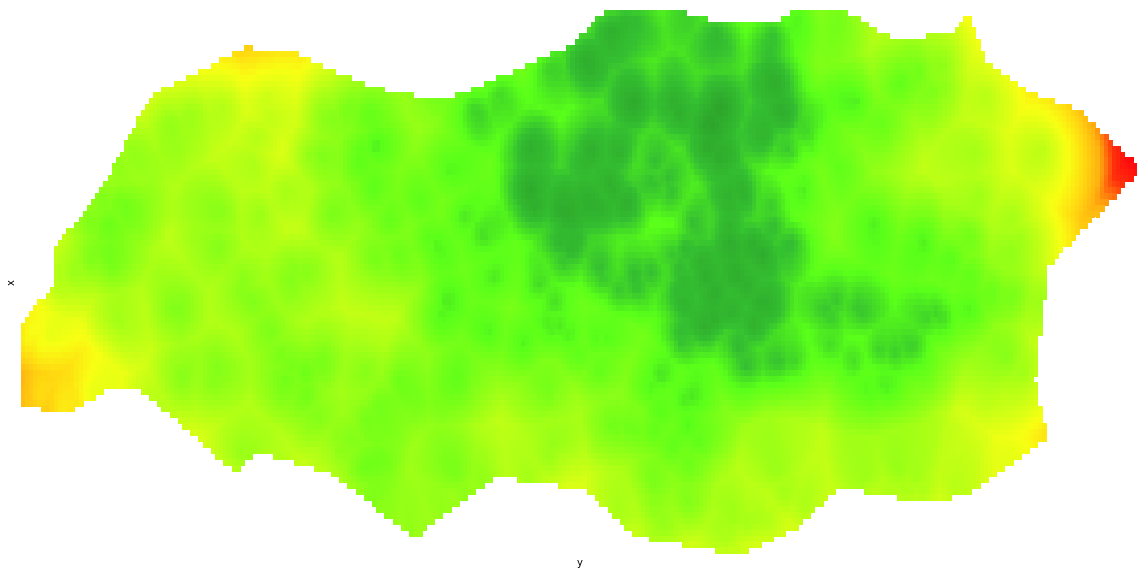

In [33]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.colors

x, y, z = list(df["lat"]), list(df["long"]), list(df["QOL"])

fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches

flatui = ["#2da52b","#34bf31","#59FF19", "#80FF18", "#A7FF16", "#CFFF15", "#F8FF13", 
          "#FFDB11","#FFB210",  "#FF310B", "#FF090F"]
sns.set_palette(flatui)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",flatui)
data = pd.DataFrame(data={'x':x, 'y':y, 'z':z})
data = data.pivot(index='x', columns='y', values='z')
sns.heatmap(data, xticklabels=False, yticklabels=False,ax=ax ,cmap=cmap, cbar=False)
